In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mtick
from random import sample

In [2]:
df_EDA = pd.read_csv('time_independent_combined_dataset.csv')

/Users/zhaoyiting/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Current Dataset EDA 

In [4]:
df_EDA['LoanStatus'].unique()

array(['PIF', 'CHGOFF', 'EXEMPT'], dtype=object)

In [5]:
df_EDA = df_EDA[df_EDA['LoanStatus']!='EXEMPT']

In [6]:
df_EDA[df_EDA['LoanStatus']=='CHGOFF'].count()

Unnamed: 0                    8865
BorrState                     8865
GrossApproval                 8865
ApprovalDate                  8865
TermInMonths                  8865
ProjectState                  8865
BusinessType                  8852
LoanStatus                    8865
ChargeOffDate                 8865
GrossChargeOffAmount          8865
sub_zipcode                   8865
is_Same_Borr_CDC              8865
is_Same_Borr_Project          8865
log_amount                    8865
loan_purpose                  8865
indicator_NaicsCode           8865
sub_NaicsCode                 8865
end_date                      8865
ApprovalYear                  8865
EndYear                       8865
start_index                   8865
end_index                     8865
start_day                     8865
end_day                       8865
time                          8865
status                        8865
id                            8865
S&P500                        8865
VIX                 

In [8]:
df_EDA['ApprovalDate'] = pd.to_datetime(df_EDA['ApprovalDate'])

In [9]:
df_EDA['year'] = df_EDA['ApprovalDate'].dt.year
df_EDA['is_default'] = 0
df_EDA['is_default'].loc[df_EDA['LoanStatus']=='CHGOFF'] = 1

/Users/zhaoyiting/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
df_EDA['is_default'].sum()

8865

<ipython-input-11-a9126bb274cf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate by Approval Year')

<Figure size 720x432 with 0 Axes>

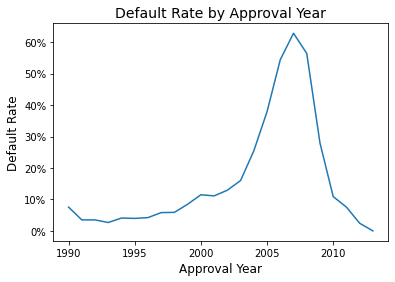

In [11]:
## Default Rate by Approval Year
df_default = df_EDA.groupby('year')['is_default'].mean().reset_index()
df_default = df_default.set_index('year')
size = np.ones(24)
plt.figure(figsize=(10,6))
df_default.plot(legend=None)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=12)
plt.ylabel('Default Rate',fontsize=12,rotation=90)
plt.title('Default Rate by Approval Year',fontsize=14)

<ipython-input-28-7009f2f6ad69>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Business Type By Approval Year')

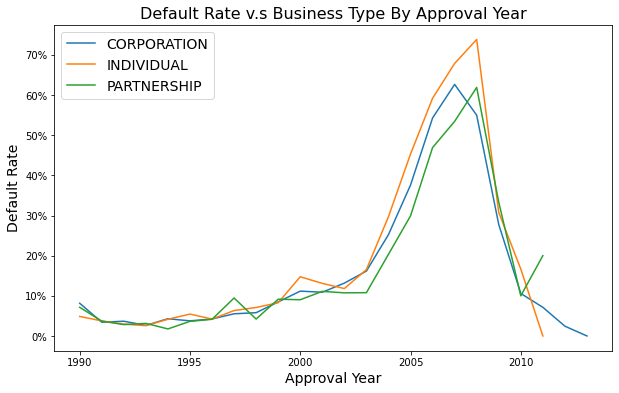

In [28]:
## Default Rate v.s BusinessType By Approval Year
df_business = df_EDA.groupby(['year','BusinessType'])['is_default'].mean().reset_index()
df_business = df_business.set_index('year')
plt.figure(figsize=(10,6))
df_business.groupby('BusinessType')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=14)
plt.ylabel('Default Rate',fontsize=14,rotation=90)
plt.legend(fontsize=14)
plt.title('Default Rate v.s Business Type By Approval Year',fontsize=16)

In [13]:
def bin_amount(amount):
    if amount<100000:
        return '<100K'
    elif amount<300000:
        return '100K-300K'
    elif amount<500000:
        return '300K-500K'
    elif amount<1000000:
        return '500K-1M'
    elif amount<2000000:
        return '1M-2M'
    else:
        return '>2M'

<ipython-input-30-cd20d5fd8b73>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Loan Amount By Approval Year')

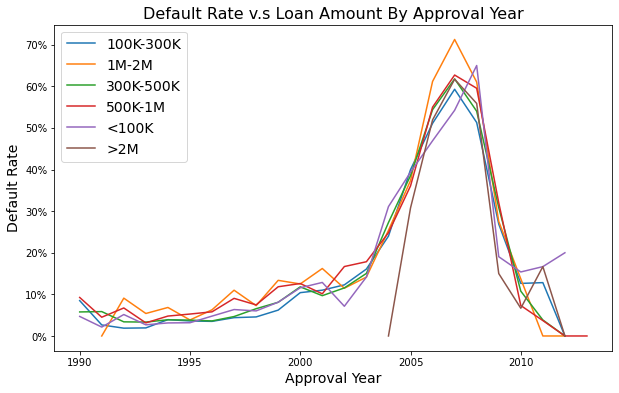

In [30]:
## Default Rate v.s Loan Amount By Approval Year
df_amount = df_EDA.copy()
df_amount['amount'] = df_amount.apply(lambda row:bin_amount(row['GrossApproval']),axis=1)
df_amount = df_amount.groupby(['year','amount'])['is_default'].mean().reset_index()
df_amount = df_amount.set_index('year')
plt.figure(figsize=(10,6))
df_amount.groupby('amount')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=14)
plt.ylabel('Default Rate',fontsize=14,rotation=90)
plt.legend(fontsize=14)
plt.title('Default Rate v.s Loan Amount By Approval Year',fontsize=16)

<ipython-input-15-d00f438f7ed7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Naics Code By Approval Year')

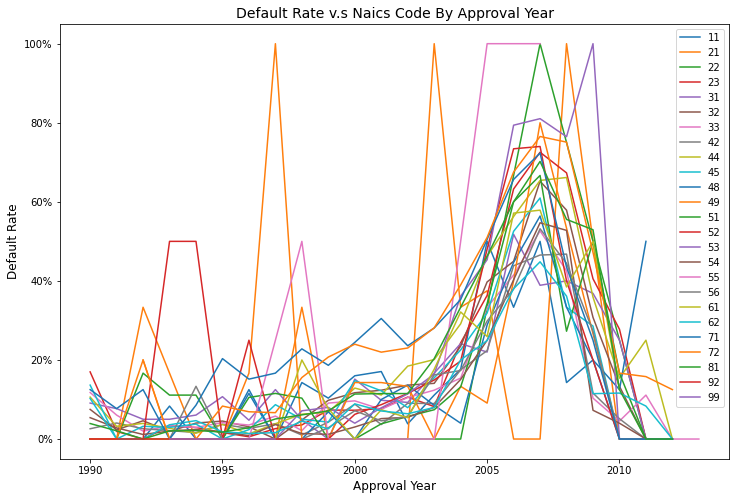

In [15]:
## Default Rate v.s NaicsCode By Approval Year
df_EDA_Naics = df_EDA[df_EDA['sub_NaicsCode']!=0]
df_Naics = df_EDA_Naics.groupby(['year','sub_NaicsCode'])['is_default'].mean().reset_index()
df_Naics = df_Naics.set_index('year')
plt.figure(figsize=(12,8))
df_Naics.groupby('sub_NaicsCode')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=12)
plt.ylabel('Default Rate',fontsize=12,rotation=90)
plt.title('Default Rate v.s Naics Code By Approval Year',fontsize=14)

<ipython-input-16-89237afeb50e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Loan Purpose By Approval Year')

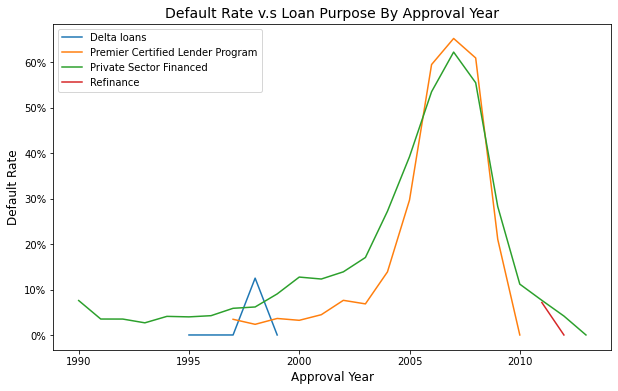

In [16]:
## Default Rate v.s loan_purpose By Approval Year
df_purpose = df_EDA.groupby(['year','loan_purpose'])['is_default'].mean().reset_index()
df_purpose = df_purpose.set_index('year')
plt.figure(figsize=(10,6))
df_purpose.groupby('loan_purpose')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=12)
plt.ylabel('Default Rate',fontsize=12,rotation=90)
plt.title('Default Rate v.s Loan Purpose By Approval Year',fontsize=14)

In [17]:
def state_to_region(state):
    if state in ['AK','AZ','CA','CO','HI','ID','MT','NM','NV','OR','UT','WA','WY']:
        return 'West'
    elif state in ['AL','AR','DC','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV']:
        return 'South'
    elif state in ['IA','IL','IN','KS','MI','MN','MO','ND','NE','OH','SD','WI']:
        return 'Midwest'
    else:
        return 'Northeast'

<ipython-input-18-aa667f6c1839>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Borrower Region By Approval Year')

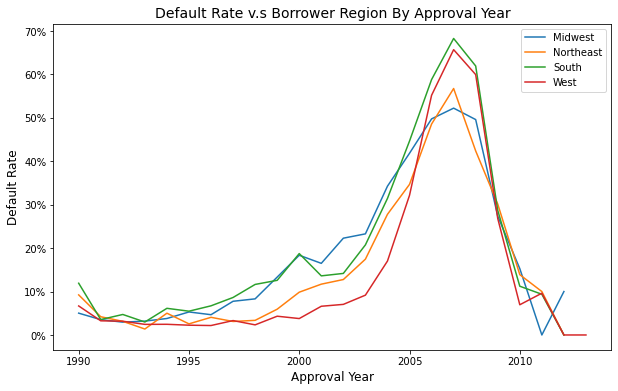

In [18]:
## Default Rate v.s Borrower State By Approval Year
df_state = df_EDA.copy()
df_state['region'] = df_state.apply(lambda row:state_to_region(row['BorrState']),axis=1)
df_state = df_state.groupby(['year','region'])['is_default'].mean().reset_index()
df_state = df_state.set_index('year')
plt.figure(figsize=(10,6))
df_state.groupby('region')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=12)
plt.ylabel('Default Rate',fontsize=12,rotation=90)
plt.title('Default Rate v.s Borrower Region By Approval Year',fontsize=14)

<ipython-input-29-3b6712f0df1a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Project Region By Approval Year')

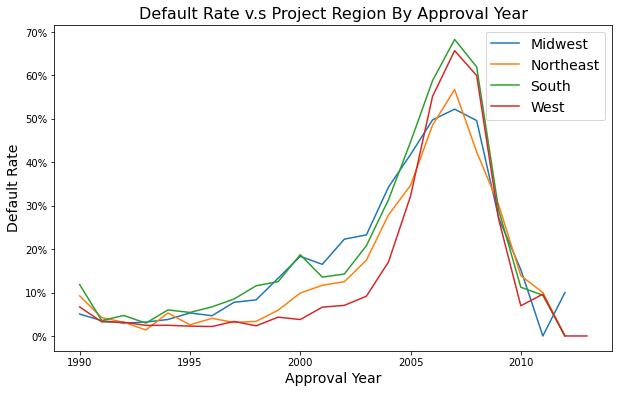

In [29]:
## Default Rate v.s Project State By Approval Year
df_state = df_EDA.copy()
df_state['region'] = df_state.apply(lambda row:state_to_region(row['ProjectState']),axis=1)
df_state = df_state.groupby(['year','region'])['is_default'].mean().reset_index()
df_state = df_state.set_index('year')
plt.figure(figsize=(10,6))
df_state.groupby('region')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=14)
plt.ylabel('Default Rate',fontsize=14,rotation=90)
plt.legend(fontsize=14)
plt.title('Default Rate v.s Project Region By Approval Year',fontsize=16)

<ipython-input-20-98ca0457071a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Matching Lending State By Approval Year')

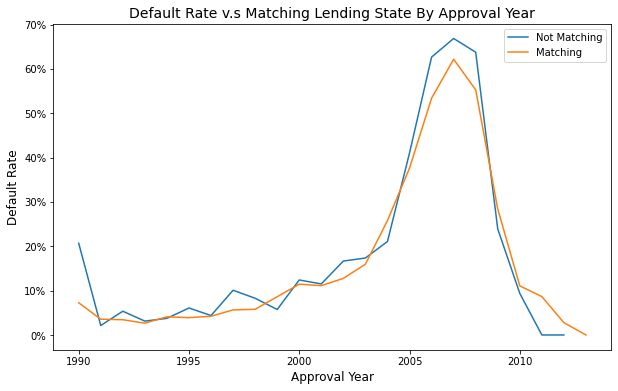

In [20]:
## Annual Default Rate by is_Same_Borr_CDC
df_Borr_CDC = df_EDA.groupby(['year','is_Same_Borr_CDC'])['is_default'].mean().reset_index()
df_Borr_CDC = df_Borr_CDC.set_index('year')
plt.figure(figsize=(10,6))
df_Borr_CDC.groupby('is_Same_Borr_CDC')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=12)
plt.ylabel('Default Rate',fontsize=12,rotation=90)
plt.legend(labels=['Not Matching','Matching'])
plt.title('Default Rate v.s Matching Lending State By Approval Year',fontsize=14)

<ipython-input-21-e1e3d09185a6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Matching Project State By Approval Year')

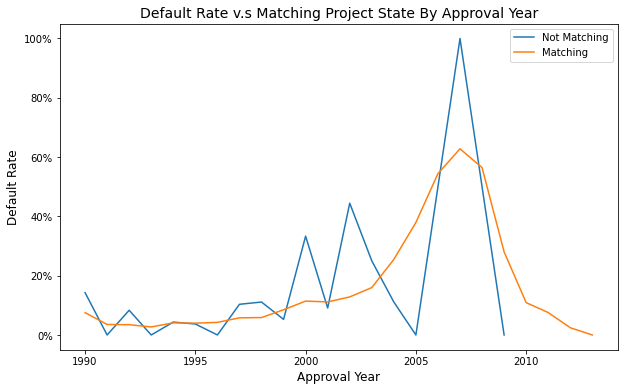

In [21]:
## Annual Default Rate by is_Same_Borr_Project
df_Borr_Project = df_EDA.groupby(['year','is_Same_Borr_Project'])['is_default'].mean().reset_index()
df_Borr_Project = df_Borr_Project.set_index('year')
plt.figure(figsize=(10,6))
df_Borr_Project.groupby('is_Same_Borr_Project')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=12)
plt.ylabel('Default Rate',fontsize=12,rotation=90)
plt.legend(labels=['Not Matching','Matching'])
plt.title('Default Rate v.s Matching Project State By Approval Year',fontsize=14)

In [22]:
def bin_terms(term):
    if term<=24:
        return '(0,24]'
    elif term <=72:
        return '(24,72]'
    elif term<=120:
        return '(72,120]'
    elif term<=240:
        return '(120,240]'
    else:
        return '>240'

<ipython-input-23-e1a2d63a959c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Default Rate v.s Loan Terms By Approval Year')

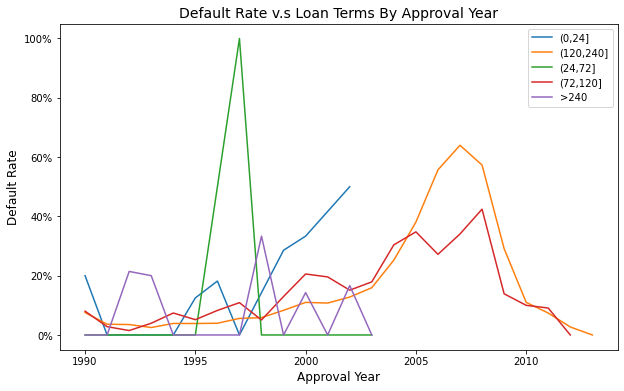

In [23]:
## Annual Default Rate by TermInMonths
df_term = df_EDA.copy()
df_term['term'] = df_term.apply(lambda row:bin_terms(row['TermInMonths']),axis=1)
df_term = df_term.groupby(['year','term'])['is_default'].mean().reset_index()
df_term = df_term.set_index('year')
plt.figure(figsize=(10,6))
df_term.groupby('term')['is_default'].plot(legend=True)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel('Approval Year',fontsize=12)
plt.ylabel('Default Rate',fontsize=12,rotation=90)
plt.title('Default Rate v.s Loan Terms By Approval Year',fontsize=14)

In [25]:
df_010 = pd.read_csv('time_varing_combined_dataset.csv')

/Users/zhaoyiting/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
df_010[df_010['HPI'] == 10].T

,74245,74246,74247,74248,74249,74250,74251,74252,74253,74254,...,4625411,4625412,4625757,4625758,4625863,4625864,4626735,4626736,4627227,4627570
Unnamed: 0,74245,74246,74247,74248,74249,74250,74251,74252,74253,74254,...,4625411,4625412,4625757,4625758,4625863,4625864,4626735,4626736,4627227,4627570
BorrState,NH,NH,NH,NH,NH,NH,NH,NH,NH,NH,...,CT,CT,MA,MA,CT,CT,CT,CT,CT,ME
GrossApproval,518000,518000,518000,518000,518000,518000,518000,518000,518000,518000,...,742000,742000,1133000,1133000,582000,582000,2177000,2177000,5000000,282000
ApprovalDate,1990-10-05 00:00:00,1990-10-05 00:00:00,1990-10-05 00:00:00,1990-10-05 00:00:00,1990-10-05 00:00:00,1990-10-05 00:00:00,1990-10-05 00:00:00,1990-10-05 00:00:00,1990-10-05 00:00:00,1990-10-05 00:00:00,...,2013-11-13,2013-11-13,2013-11-20,2013-11-20,2013-11-22,2013-11-22,2013-12-18,2013-12-18,2014-01-06,2014-01-29
TermInMonths,240,240,240,240,240,240,240,240,240,240,...,240,240,240,240,240,240,240,240,240,240
ProjectState,NH,NH,NH,NH,NH,NH,NH,NH,NH,NH,...,CT,CT,MA,MA,CT,CT,CT,CT,CT,ME
BusinessType,CORPORATION,CORPORATION,CORPORATION,CORPORATION,CORPORATION,CORPORATION,CORPORATION,CORPORATION,CORPORATION,CORPORATION,...,CORPORATION,CORPORATION,PARTNERSHIP,PARTNERSHIP,CORPORATION,CORPORATION,CORPORATION,CORPORATION,CORPORATION,CORPORATION
LoanStatus,PIF,PIF,PIF,PIF,PIF,PIF,PIF,PIF,PIF,PIF,...,EXEMPT,EXEMPT,EXEMPT,EXEMPT,EXEMPT,EXEMPT,EXEMPT,EXEMPT,EXEMPT,EXEMPT
ChargeOffDate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrossChargeOffAmount,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
